In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

In [2]:
outcomes = make_array('heads', 'tails')
outcomes

array(['heads', 'tails'],
      dtype='<U5')

In [10]:
np.random.choice(outcomes)

'tails'

In [11]:
np.random.choice(outcomes, 10)
# simulate 10 coin tosses

array(['heads', 'heads', 'tails', 'heads', 'heads', 'heads', 'heads',
       'tails', 'tails', 'heads'],
      dtype='<U5')

In [12]:
np.random.choice(outcomes, 10) == 'heads' # we are checking for equality here, where in my array does it equal heads?
# what does this output?
# and what does it mean?



array([ True, False, False,  True,  True,  True, False,  True, False,  True], dtype=bool)

In [13]:
sum(np.random.choice(outcomes, 10) == 'heads')
# for example:
# sum(array([ True, False, False,  True,  True,  True, False,  True, False,  True]))
# sum(array([  1,     0,       0,     1,     1,     1,   0,      1,    0,      1]))
# counting 1's or counting Trues
# counting number of Heads
# what does 5 mean?
# 5 heads

5

In [14]:
sum(np.random.choice(outcomes, 10) == 'tails')

4

In [15]:
flips = np.random.choice(outcomes, 10)

In [16]:
sum(flips == 'heads')

2

In [17]:
sum(flips == 'tails')

8

In [18]:
def heads_in_100_tosses():
    return sum(np.random.choice(outcomes, 100) == 'heads')

In [22]:
heads_in_100_tosses()

52

In [23]:
heads_in_100_tosses()

55

In [24]:
heads_in_100_tosses()

57

In [19]:
results = make_array() # initializing an empty array, to collect stuff later

for i in np.arange(10000):
    results = np.append(results, heads_in_100_tosses())
    
results

array([ 52.,  45.,  43., ...,  58.,  50.,  46.])

In [25]:
len(results)

10000

In [20]:
heads = Table().with_columns('Heads', results)
heads

Heads
52
45
43
46
61
42
45
50
48
51


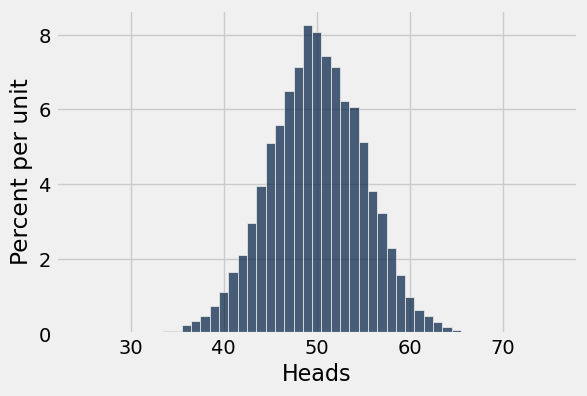

In [21]:
heads.hist('Heads', bins=np.arange(24.5, 76.5))

In [26]:
# can you write a function that calculates number of tails?
def tails_in_100_tosses():
    return sum(np.random.choice(outcomes, 100) == 'tails')





In [27]:
# bonus: can you simulate 10,000 games of 100 tosses each? calculating number of tails?
results = make_array() # initializing an empty array, to collect stuff later

for i in np.arange(10000): # np.arange(10000) = (0, 1, .... 9999),
    results = np.append(results, tails_in_100_tosses())
    
results


array([ 44.,  45.,  54., ...,  48.,  46.,  48.])

In [35]:
results = make_array() # initializing an empty array, to collect stuff later

for i in np.arange(10000): # np.arange(10) = (0, 1, .... 9),
    #print("i = ", i)
    #print("loop number = ", i+1)
    results = np.append(results, tails_in_100_tosses())
    #print("results = ", results)
    
results

array([ 58.,  47.,  54., ...,  56.,  46.,  43.])

In [28]:
len(results)

10000

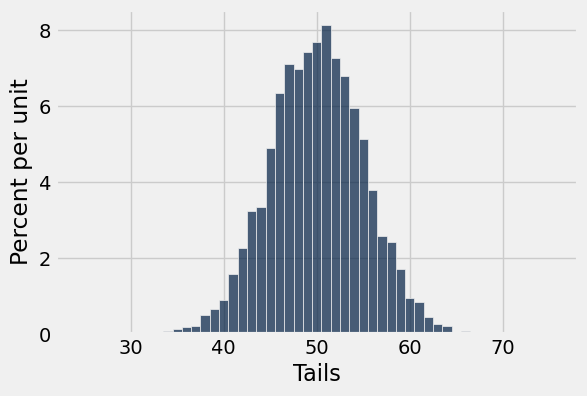

In [29]:
# bonus, bonus: create a histogram like the one above but for tails
tails = Table().with_columns('Tails', results)

tails.hist('Tails', bins=np.arange(24.5, 76.5))


In [ ]:
# OR we could have used out original Heads table
# extracted the heads column as an array
# subtract that array from 100, this gives us number of tails in each of those games of 100 tosses
# add that tails array back to heads
# and generate a histogram from the "tails" instead

# try for yourself

## Monty Hall

In [36]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'],
      dtype='<U11')

In [41]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'
    else: # considers every other case, besides 'first goat' and 'second goat'
        print("enter 'first goat' or 'second goat'")


In [38]:
other_goat('first goat')

'second goat'

In [39]:
other_goat('second goat')

'first goat'

In [42]:
other_goat('wheeler hall')

enter 'first goat' or 'second goat'


In [43]:
other_goat(1)

enter 'first goat' or 'second goat'


In [44]:
def monty_hall():
    
    contestant_choice = np.random.choice(doors) # randomly select from first goat, second goat or car
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats) # monty can choose from either first goat or second goat
        remaining_door = other_goat(monty_choice) # remaining door is second goat or first goat
        
    return [contestant_choice, monty_choice, remaining_door]

In [48]:
# what is the data type that is returned from monty_hall?

# what do the values mean?

type(['this','is','a','list'])

list

In [49]:
type(make_array('this is an', 'array'))

numpy.ndarray

In [56]:
monty_hall()
# the correct answer is to swap!

['first goat', 'second goat', 'car']

In [58]:
games = Table(['Guess', 'Revealed', 'Remaining'])
games

Guess,Revealed,Remaining


In [68]:
games.append(monty_hall()) 
# monty_hall() returns a list, essentially a row for the above table
# first entry is contestants choice or guess
# second entry is monty hall's revealed door
# third entry is remaining door (which i can swap or not)

Guess,Revealed,Remaining
car,first goat,second goat
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
second goat,first goat,car


In [69]:
games = Table(['Guess', 'Revealed', 'Remaining'])
for i in range(3000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
car,first goat,second goat
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
second goat,first goat,car
second goat,first goat,car
car,second goat,first goat


In [70]:
games.group('Remaining')
# # how many times was the remaining door a car vs a goat?

# does this mean i should swap or not?

Remaining,count
car,1987
first goat,506
second goat,507


In [71]:
games.group('Guess')
# how many times was our first choice a car vs a goat?

# does this mean i should swap or not?

Guess,count
car,1013
first goat,1013
second goat,974
